*Warning*: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.


# Assessment 5 : Big Data Analytics using Machine Learning
## Due Feburary 25th, 5pm (Firm)
### Total points: 100 ( weighted over 35)

This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML! 

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries 
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [1]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre op

In [2]:
!pip3 install pandas==1.0.5
!pip3 install pyspark

     |████████████████████████████████| 10.1 MB 5.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.


     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 45.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=914fb1333271bb11f635c12345b2f3fdf5ab102af975b37e9ba11c43e3cc8f45
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
#For visualization
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 144 kB 67.9 MB/s 
     |████████████████████████████████| 181 kB 32.7 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=0db042521718ba1f6ba593f955bf4bc58044b6305e9a331d27df52f83a7ed4f0
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [4]:
# if restart of runtime is successful, the execution of this cell should
# prints True

import pandas as pd
print(pd.__version__ == '1.0.5')

False


In [ ]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from matplotlib import pyplot
import seaborn
import random
pd.options.mode.chained_assignment = None

Import your dataset using the following cells for the Youtube videos

**Edited**

In [ ]:
from google.colab import files
uploaded = files.upload()

!unzip /content/youtube_data.zip

Saving youtube_data.zip to youtube_data.zip
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `unzip /content/youtube_data (1).zip'


In [ ]:
!unzip /content/youtube_data.zip

Archive:  /content/youtube_data.zip
   creating: youtube_data/
  inflating: youtube_data/IN_category_id.json  
   creating: __MACOSX/
   creating: __MACOSX/youtube_data/
  inflating: __MACOSX/youtube_data/._IN_category_id.json  
  inflating: youtube_data/.DS_Store  
  inflating: __MACOSX/youtube_data/._.DS_Store  
  inflating: youtube_data/FR_category_id.json  
  inflating: __MACOSX/youtube_data/._FR_category_id.json  
  inflating: youtube_data/INvideos.csv  
  inflating: __MACOSX/youtube_data/._INvideos.csv  
  inflating: youtube_data/CAvideos.csv  
  inflating: __MACOSX/youtube_data/._CAvideos.csv  
  inflating: youtube_data/FRvideos.csv  
  inflating: __MACOSX/youtube_data/._FRvideos.csv  
  inflating: youtube_data/CA_category_id.json  
  inflating: __MACOSX/youtube_data/._CA_category_id.json  
  inflating: youtube_data/US_category_id.json  
  inflating: __MACOSX/youtube_data/._US_category_id.json  
  inflating: youtube_data/USvideos.csv  
  inflating: __MACOSX/youtube_data/._USvide

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Section 5.1. : Machine Learning with Sklearn (45 points)

## 5.1.1 Data loading and Preprocessing (5 pts)

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 5.1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

**Edited**

In [ ]:
# Import all the csv files
#files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
#files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube-data/*.csv'.format('csv'))]
#sorted(files)

files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column. 
all_dataframes = list()
for csv in files:
  #all_dataframes.append(pd.read_csv(csv))
  frame = pd.read_csv(csv,index_col=0)
  frame['country'] = os.path.basename(csv)
  all_dataframes.append(frame)

combined_data = pd.concat(all_dataframes)
combined_data['country']=combined_data['country'].map(lambda x: x.lstrip('+-').rstrip('videos.csv'))
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,FR
Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,FR
ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,FR
WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",FR
ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,FR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US


#### 5.1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [ ]:
combined_data['category_id'] = combined_data['category_id'].astype(str)
js_files = [i for i in glob.glob('/content/youtube_data/*.json')]
sorted(js_files)

id_to_category = {}
for x in js_files:
  js = pd.read_json(x)
  for category in js ["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]
combined_data["category"] = combined_data["category_id"].map(id_to_category)
# Add code here

#combined_data.insert(4, 'category', # Add code here)

combined_data.head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,FR,Entertainment
Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,FR,Entertainment
ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,FR,Comedy
WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",FR,Gaming
ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,FR,Sports
teXaL6GdQRk,17.14.11,STRANGER JOKES : Jokes de Papa avec les teens ...,"Le Jeu, C'est Sérieux",23,2017-11-13T15:48:57.000Z,"Stranger Jokes""|""Jokes de Papa""|""Stranger Thin...",141253,14354,202,417,https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg,False,False,False,Contenu commandité par Netflix France.\nInspir...,FR,Comedy
nduL7G_gJoY,17.14.11,De retour dans le Manoir hanté avec le Grand J...,silent jill,24,2017-11-12T19:00:08.000Z,"fantome""|""esprits""|""spiritisme""|""hanté""|""ouija...",187654,9286,1381,2419,https://i.ytimg.com/vi/nduL7G_gJoY/default.jpg,False,False,False,"Bonsoir à tous, \nJe tenais beaucoup à retourn...",FR,Entertainment
QmpWE_SODZA,17.14.11,"T'es qui toi ? Squeezie, le youtubeur aux 4 mi...",Salut les terriens !,24,2017-11-13T17:30:01.000Z,"salut les terriens""|""squeezie""|""jeux videos""|""...",91051,1674,1903,701,https://i.ytimg.com/vi/QmpWE_SODZA/default.jpg,False,False,False,"Dans Salut Les Terriens, Thierry Ardisson, reç...",FR,Entertainment
GBVxEpQr8R8,17.14.11,ON VOUS DÉVOILE NOTRE VRAI SALAIRE,Mcfly & Carlito,24,2017-11-12T08:59:25.000Z,"mcfly""|""carlito""|""golden moustache""|""fatshow""|...",2340941,200598,6018,7575,https://i.ytimg.com/vi/GBVxEpQr8R8/default.jpg,False,False,False,Nouvelle vidéo tous les dimanches matins 10h. ...,FR,Entertainment


#### 5.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [ ]:
# Add code here
combined_data.info()
combined_data['trending_date'] = pd.to_datetime(combined_data["trending_date"],format ="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")

# Add your Code here to remove NA's
combined_data = combined_data.dropna()
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 159906 entries, Ro6eob0LrCY to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           159906 non-null  object
 1   title                   159906 non-null  object
 2   channel_title           159906 non-null  object
 3   category_id             159906 non-null  object
 4   publish_time            159906 non-null  object
 5   tags                    159906 non-null  object
 6   views                   159906 non-null  int64 
 7   likes                   159906 non-null  int64 
 8   dislikes                159906 non-null  int64 
 9   comment_count           159906 non-null  int64 
 10  thumbnail_link          159906 non-null  object
 11  comments_disabled       159906 non-null  bool  
 12  ratings_disabled        159906 non-null  bool  
 13  video_error_or_removed  159906 non-null  bool  
 14  description             15

In [ ]:
# print
print('validate_na',(combined_data.shape))

validate_na (0, 17)


## 5.2 Exploratory Data Analysis & Feature Engineering (20pt)


**Exploratory Data Analysis:** 
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:** 
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

#### 5.2.1: Calculating Mean, standard deviation, min and max. (1 pt)

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [ ]:
combined_data.describe()

,views,likes,dislikes,comment_count
count,1.545670e+05,1.545670e+05,1.545670e+05,1.545670e+05
mean,1.281578e+06,4.096105e+04,2.056138e+03,4.606594e+03
std,4.605292e+06,1.521490e+05,1.825854e+04,2.327823e+04
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.574900e+04,1.321000e+03,8.100000e+01,1.720000e+02
50%,3.134280e+05,6.336000e+03,2.980000e+02,7.650000e+02
75%,9.473390e+05,2.594050e+04,1.024000e+03,2.726000e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [ ]:

# Add your code here
maxs = combined_data.describe().iloc[7].values.tolist()
mins = combined_data.describe().iloc[3].values.tolist()
stds = combined_data.describe().iloc[2].values.tolist()
means = combined_data.describe().iloc[1].values.tolist()



In [ ]:
# print here
print('check_min_max_mean_std',([maxs, mins, stds, means]))


check_min_max_mean_std [[225211923.0, 5613827.0, 1643059.0, 1228655.0], [223.0, 0.0, 0.0, 0.0], [4605292.4783858, 152148.9548547516, 18258.54137966084, 23278.225620617734], [1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425]]


#### 5.2.2: Rescaling the features (1 pt)

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [ ]:
# Add your code here
combined_data['likes_log'] = np.log(1 + combined_data['likes']) 
combined_data['views_log'] = np.log(1 + combined_data['views']) 
combined_data['dislikes_log'] = np.log(1 + combined_data['dislikes']) 
combined_data['comment_log'] = np.log(1 + combined_data['comment_count']) 

In [ ]:
# Print results
print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.571590187188617, 12.552679805013122, 5.614484952080919, 6.424543615108245]


#### 5.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

In [ ]:
log_df

,likes_log,views_log,dislikes_log,comment_log
video_id,,,,


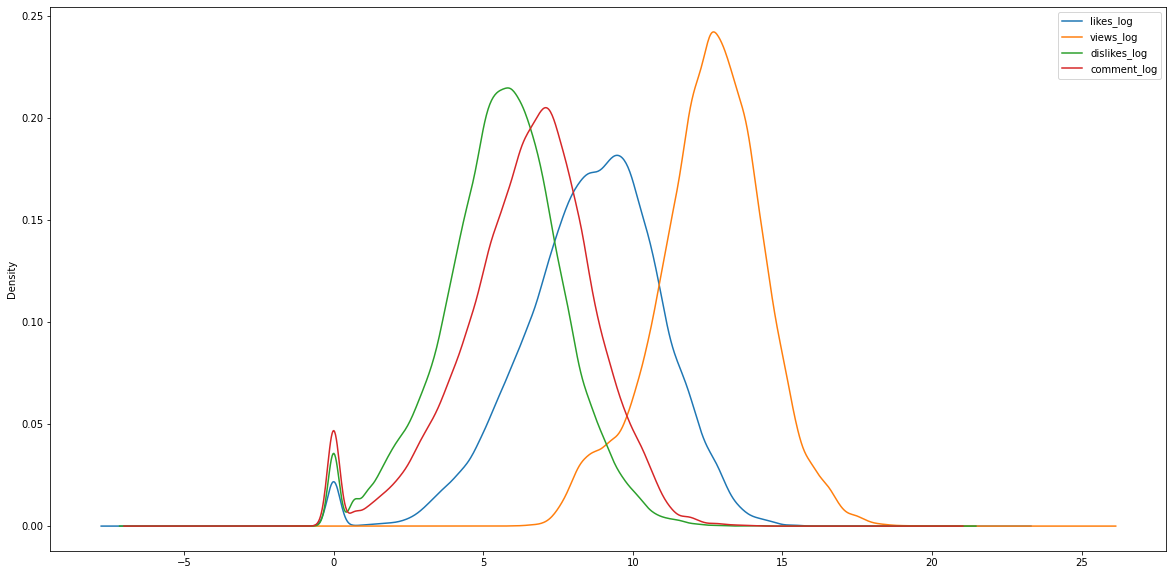

In [ ]:
# Add your code here for plotting the distribution
log_df=combined_data[['likes_log','views_log','dislikes_log','comment_log']]
log_df.plot.kde(figsize=(20,10))
# plot data

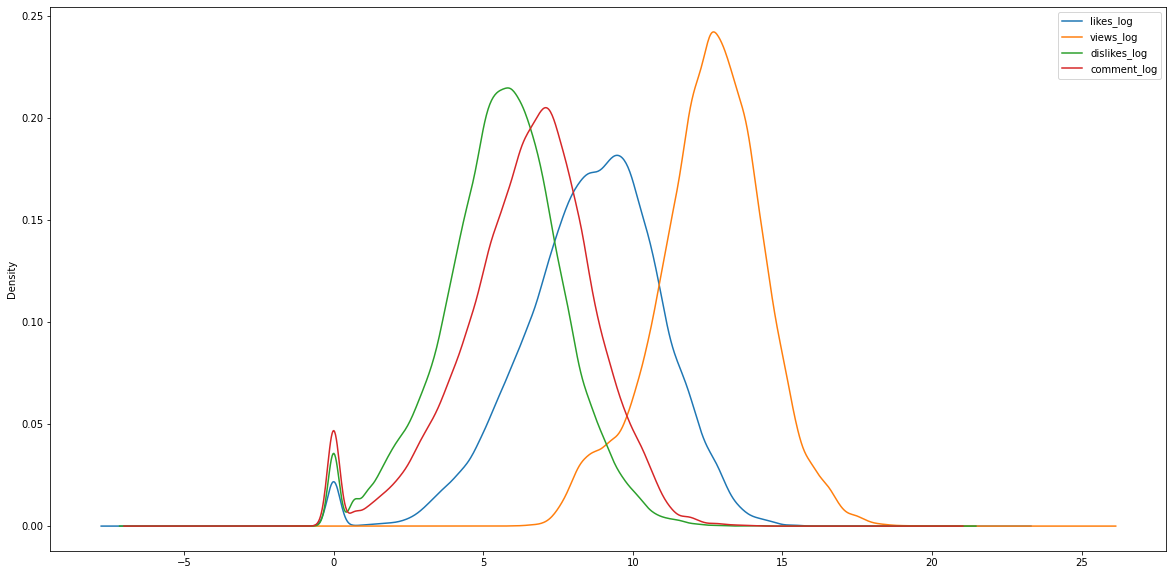

In [ ]:
# Add your code here for plotting the distribution
log_df=combined_data[['likes_log','views_log','dislikes_log','comment_log']]
log_df.plot.kde(figsize=(20,10))
# plot data

#### 5.2.4: Comparing views, likes, dislikes against categories (3 pt)

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

In [ ]:
# Your code goes here
# Plots will be manually graded
##1-Total videos for each category:
by_category = combined_data.groupby(["category"]).size().sort_values(ascending = False)
print('Total videos for each category: \n', by_category)

Total videos for each category: 
 category
Entertainment            48964
Music                    17818
Comedy                   14790
News & Politics          14713
People & Blogs           13954
Sports                    9488
Howto & Style             9309
Film & Animation          7874
Science & Technology      4846
Education                 4544
Gaming                    3592
Pets & Animals            1522
Autos & Vehicles          1406
Travel & Events            889
Shows                      485
Nonprofits & Activism      338
Movies                      33
Trailers                     2
dtype: int64


In [ ]:
import plotly.express as px
df_cat=pd.DataFrame(by_category)
df_cat['category'] = df_cat.index
df_cat.columns=['a','b']
fig4 = px.bar(df_cat, x="b", y="a",color='a',labels={'b':'Category','a':'Videos/Category'}, height=400)
fig4.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

(Text(0.5, 1.0, 'Distribution of Views against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'View Logs'))

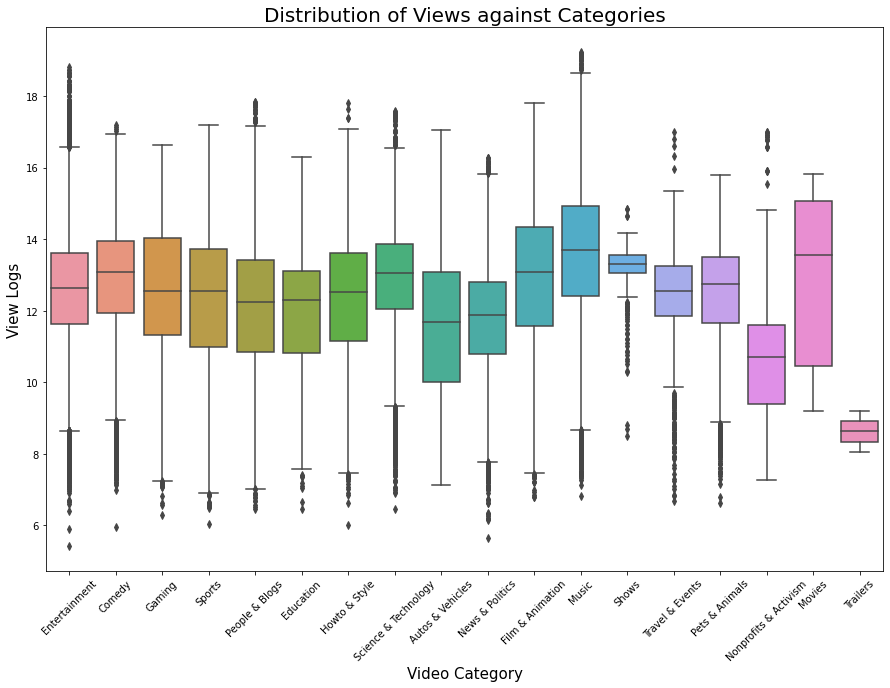

In [ ]:
##2-Distribution of views against categories, using boxplot and views on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="views_log", data=combined_data[['category','views_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Views against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='View Logs',fontsize=15)          
# #To close the warning
# fill with colors

(Text(0.5, 1.0, 'Distribution of Dislikes against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'Dislike Logs'))

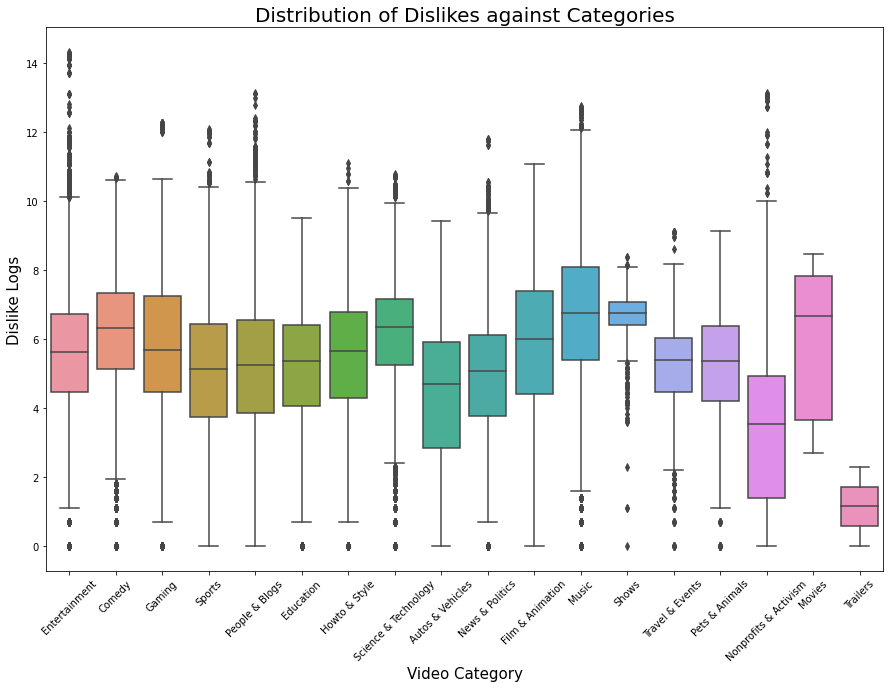

In [ ]:
##3-Distribution of dislikes against categories, Using boxplot and dislikes on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="dislikes_log", data=combined_data[['category','dislikes_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Dislikes against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='Dislike Logs',fontsize=15)  


In [ ]:
#How long does a video trend in a country?
#What are some videos which got popular because they were disliked?

**How long does a video trend in a country?**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f66bde51c50>,
 Text(0.5, 1.0, 'Number of Mean Video Trending in Each Country '))

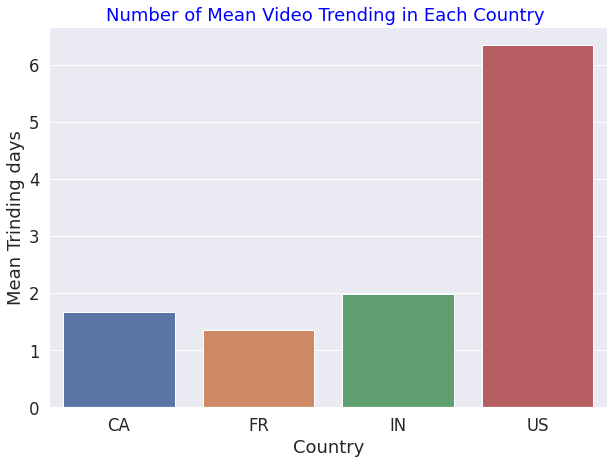

In [ ]:
df=combined_data.drop_duplicates()
df1=df.groupby(['title','country']).size().reset_index(name='count')
trending=df1.groupby('country')['count'].mean().to_frame().reset_index().rename(columns={"country": "Country", "count": "Mean Trinding days"})

fig, ax = pyplot.subplots(figsize=(10, 7)),sns.set(font_scale=1.5)
sns.barplot(x="Country", y="Mean Trinding days", data=trending,ax=ax),plt.title('Number of Mean Video Trending in Each Country ',color='Blue')

**What are some videos which got popular because they were disliked?**

In [ ]:
df2=df.groupby(['title','dislikes','likes']).size().reset_index(name='Trend_Days')
trending_dislikes=df2.loc[(df2['dislikes'] > df2['likes']) & (df2['Trend_Days'] >= 3)] #Videos which got trends and have dislikes more than likes#
trending_dislikes=trending_dislikes.sort_values(['Trend_Days'],ascending=[ False])
print('Videos which got popular because they were disliked: \n \n',trending_dislikes.title.to_string(index=False))

Videos which got popular because they were disliked: 
 
  Jeffrey Tambor Fired From 'Transparent' Follow...
 5 Things You Missed at the 2018 SAG Awards | E...
 Fergie Performs The U.S. National Anthem / 201...
                        Staudt on Sports I 1-22-18
         WATCH: Sen. Mitch McConnell on tax reform
                               二贵摔跤 - tienghoa.net


#### 5.2.5: Feature Engineering (8 pts)



##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [ ]:
# Add your code here
num_tags=[]
xdf=combined_data.reset_index(drop=True)
for i in range(len(combined_data)):
  if xdf.at[i,'tags']=='[none]': #some videos has no tags but instead [none], so we are going to consider it as Zero tags.
    count=0
  else:
    count=(xdf.at[i,'tags']).count("|") + 1 
  num_tags.append(count)
combined_data['num_tags']=num_tags
combined_data


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags
video_id,,,,,,,,,,,,,,,,,,,,,,
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,Music,13.576525,16.658009,10.678698,11.743108,6
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,11.758183,13.830056,7.431892,9.475086,11
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,Comedy,11.891608,14.975981,8.582981,9.009692,23
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment,11.792374,14.555460,7.595890,9.771041,14
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,Music,14.306622,17.327761,9.956222,11.351206,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,2018-06-14,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,22,2018-05-18 16:39:29,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27
BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18 13:00:04,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14
D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18 17:34:22,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24


##### b. Processing description and title (2 pts.)

Calculate the length of description and title and add them as features to the dataset

In [ ]:
# Add your code here
combined_data["desc_len"]=combined_data["description"].apply(lambda x: len(x))

In [ ]:
# Add your code here

combined_data["len_title"]=combined_data["title"].apply(lambda x: len(x))

In [ ]:
# Print cell
print('check_tags_title_description \n',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description 
 [count    154567.000000
mean         18.580551
std          11.929906
min           0.000000
25%           9.000000
50%          17.000000
75%          26.000000
max         124.000000
Name: num_tags, dtype: float64, count    154567.000000
mean        959.949426
std         857.504028
min           1.000000
25%         363.000000
50%         717.000000
75%        1288.000000
max        5260.000000
Name: desc_len, dtype: float64, count    154567.000000
mean         56.408541
std          22.976198
min           2.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [ ]:
date_data=combined_data['publish_time']

In [ ]:
# Add your code here
combined_data['publish_time'] =date_data.apply(lambda x: pd.to_datetime(x).time())
combined_data['publish_date'] =date_data.apply(lambda x: pd.to_datetime(x).date())

#day on which video was published
combined_data['publish_weekday']=date_data.apply(lambda x: x.dayofweek)+1

import random
random_index = random.randint(0,combined_data.shape[0]-1)


In [ ]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(19, 51, 16), datetime.date(2018, 2, 14), [18641, 18931, 22146, 22501, 22523, 23573, 26252]]


##### d. Number of videos per weekday (1 pt)

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f66c4164150>,
 Text(0.5, 1.0, 'Number of puplished videos per week days '))

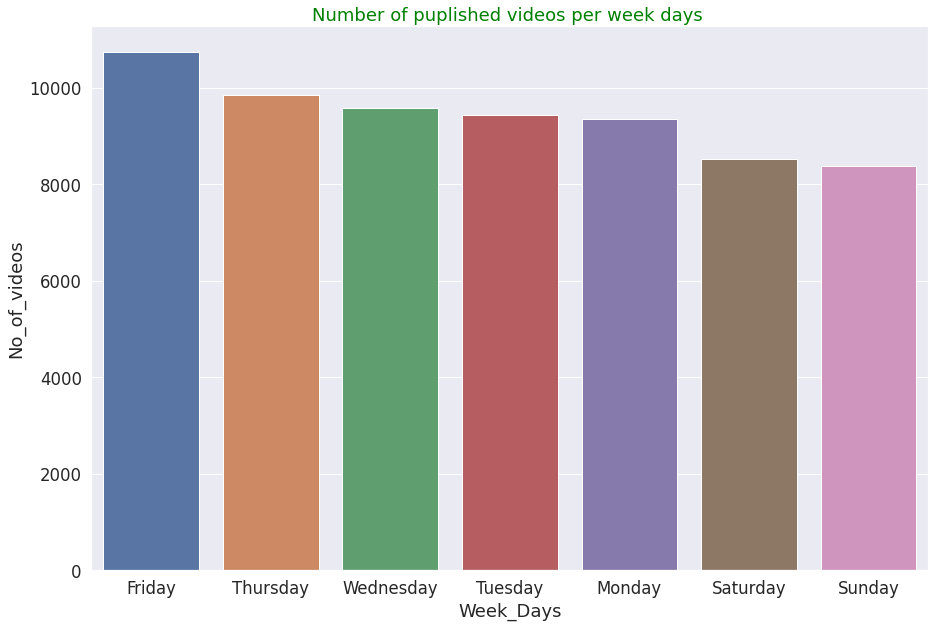

In [ ]:
# Add your code for plot here

##Creating dataframe after deleting videos which stay trending for more than one day according to the Video ID
dfx=combined_data.reset_index(level=0)[['video_id','publish_weekday']].drop_duplicates(subset = ['video_id'], keep = 'last')

##Mapping the day number : day name
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfx['publish_weekday'] = dfx['publish_weekday'].map(dayOfWeek)

##Calculating and plotting
videos_weekday = dfx['publish_weekday'].value_counts().to_frame().reset_index().rename(columns={"index": "Week_Days", "publish_weekday": "No_of_videos"})
fig, ax = pyplot.subplots(figsize=(15, 10)),sns.set(font_scale=1.5)
sns.barplot(x="Week_Days", y="No_of_videos", data=videos_weekday,ax=ax),plt.title('Number of puplished videos per week days ',color='Green')
# Plots will be manually graded

#### 5.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. 

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [ ]:
combined_data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'publish_date', 'publish_weekday'],
      dtype='object')

In [ ]:
# Add your code here
combined_data.drop(['trending_date', 'title', 'channel_title', 'category_id',
                    'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
                    'thumbnail_link', 'description', 'publish_date'], axis = 1,inplace = True)

In [ ]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_weekday
video_id,,,,,,,,,,,,,
n1WpP7iowLc,False,False,False,CA,Music,13.576525,16.658009,10.678698,11.743108,6,594,42,5
0dBIkQ4Mz1M,False,False,False,CA,Comedy,11.758183,13.830056,7.431892,9.475086,11,704,29,1
5qpjK5DgCt4,False,False,False,CA,Comedy,11.891608,14.975981,8.582981,9.009692,23,1177,53,7
d380meD0W0M,False,False,False,CA,Entertainment,11.792374,14.555460,7.595890,9.771041,14,636,24,7
2Vv-BfVoq4g,False,False,False,CA,Music,14.306622,17.327761,9.956222,11.351206,10,1250,43,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,US,People & Blogs,13.378383,15.926830,8.307213,11.044696,27,926,52,5
BZt0qjTWNhw,False,False,False,US,Pets & Animals,10.549569,14.337638,7.234177,7.885329,14,46,28,5
D6Oy4LfoqsU,False,False,False,US,Entertainment,10.780393,13.879848,6.940222,8.292298,24,775,84,5


#### 5.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [ ]:
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
combined_data.category = combined_data.category.astype('category')
combined_data= pd.get_dummies(combined_data)
# Hint: Use pd.get_dummies()range. 

In [ ]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n1WpP7iowLc,False,False,False,13.576525,16.658009,10.678698,11.743108,6,594,42,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0dBIkQ4Mz1M,False,False,False,11.758183,13.830056,7.431892,9.475086,11,704,29,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5qpjK5DgCt4,False,False,False,11.891608,14.975981,8.582981,9.009692,23,1177,53,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
d380meD0W0M,False,False,False,11.792374,14.555460,7.595890,9.771041,14,636,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2Vv-BfVoq4g,False,False,False,14.306622,17.327761,9.956222,11.351206,10,1250,43,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1PhPYr_9zRY,False,False,False,13.378383,15.926830,8.307213,11.044696,27,926,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
BZt0qjTWNhw,False,False,False,10.549569,14.337638,7.234177,7.885329,14,46,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
D6Oy4LfoqsU,False,False,False,10.780393,13.879848,6.940222,8.292298,24,775,84,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Print cell.
print('check_final_df',(combined_data.shape))

check_final_df (154567, 39)


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [ ]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')

#### 5.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [ ]:
combined_data.columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN',
       'country_US', 'category_Autos & Vehicles', 'category_Comedy',
       'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Movies', 'category_Music',
       'category_News & Politics', 'category_Nonprofits & Activism',
       'category_People & Blogs', 'category_Pets & Animals',
       'category_Science & Technology', 'category_Shows', 'category_Sports',
       'category_Trailers', 'category_Travel & Events', 'publish_weekday_1',
       'publish_weekday_2', 'publish_weekday_3', 'publish_weekday_4',
       'publish_weekday_5', 'publish_weekday_6', 'publish_weekday_7'],
      dtype='object')

In [ ]:
# Add your code here
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)

In [ ]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ro6eob0LrCY,False,False,False,10.284762,12.267652,7.011214,8.247482,6,1412,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Yo84eqYwP98,False,False,False,9.550662,12.977851,6.357842,7.057898,0,1828,100,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ceqntSXE-10,False,False,False,11.241169,13.086019,6.169611,9.167537,5,338,55,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
WuTFI5qftCE,False,False,False,11.350607,13.737790,6.311735,8.367300,8,170,31,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ee6OFs8TdEg,False,False,False,8.998631,11.861439,4.290459,6.177944,24,1384,58,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iNHecA3PJCo,False,False,False,8.099251,12.275501,6.003887,5.283204,19,818,100,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
dpPmPbhcslM,False,False,False,7.454141,12.916148,6.171701,7.264730,8,468,26,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
mV6aztP58f8,False,False,False,7.104144,12.864421,6.118097,6.548219,8,2187,57,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154567, 38), count    154567.000000
mean         12.552680
std           1.816821
min           5.411646
25%          11.469496
50%          12.655328
75%          13.761413
max          19.232552
Name: label, dtype: float64]


## 5.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 5.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [ ]:
from sklearn.model_selection import train_test_split
# Add your code here
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 38), (30914, 38), (123653,), (30914,)]


### 5.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Add your code here
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# Create linear regression object
lin_R = LinearRegression()

# Train the model using the training sets
lin_R.fit(x_train, y_train)

# Make predictions

y_predict_test = lin_R.predict(x_test)
y_predict_train= lin_R.predict(x_train)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % lin_R.score(x_test, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.86
mse_value of Test= 0.44895240174155987
mse_value of Train= 0.44488532127199826


In [ ]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_predict_test))))

check_lr 0.6700391046361099


#### 5.3.2.2  Dimensionality reduction with PCA (6 pts)



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

[(0, 0.09126040512271674), (1, 0.1396252315137292), (2, 0.17828209445059698), (3, 0.2165764784059669), (4, 0.2507661205639456), (5, 0.28429373845450817), (6, 0.3170712506874996), (7, 0.34852430307377946), (8, 0.3796128158101934), (9, 0.41057895983615067), (10, 0.44110422748781714), (11, 0.4709657453130913), (12, 0.5005110985901959), (13, 0.5293122832886725), (14, 0.557660392049064), (15, 0.5857724919158135), (16, 0.6132574347951698), (17, 0.640265098299384), (18, 0.6671233159091836), (19, 0.6937820956266726), (20, 0.7202511477225665), (21, 0.7465886143258647), (22, 0.7729065001260363), (23, 0.7990893193042301), (24, 0.8248189852137747), (25, 0.8502871253434914), (26, 0.875324998947003), (27, 0.8999938892542416), (28, 0.9225396520972823), (29, 0.943005289750961), (30, 0.962153533110212), (31, 0.9794339666965223), (32, 0.9948853961557433), (33, 0.998288436229865), (34, 0.9999999999999999), (35, 0.9999999999999999), (36, 0.9999999999999999), (37, 0.9999999999999999)]


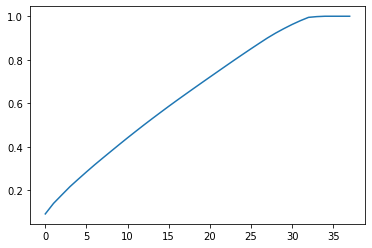

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Add your code here

pca = PCA()
sc = StandardScaler()
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)

[(0, 0.09126040512271674), (1, 0.1396252315137292), (2, 0.17828209445059698), (3, 0.2165764784059669), (4, 0.2507661205639456), (5, 0.28429373845450817), (6, 0.3170712506874996), (7, 0.34852430307377946), (8, 0.3796128158101934), (9, 0.41057895983615067), (10, 0.44110422748781714), (11, 0.4709657453130913), (12, 0.5005110985901959), (13, 0.5293122832886725), (14, 0.557660392049064), (15, 0.5857724919158135), (16, 0.6132574347951698), (17, 0.640265098299384), (18, 0.6671233159091836), (19, 0.6937820956266726), (20, 0.7202511477225665), (21, 0.7465886143258647), (22, 0.7729065001260363), (23, 0.7990893193042301), (24, 0.8248189852137747), (25, 0.8502871253434914), (26, 0.875324998947003), (27, 0.8999938892542416), (28, 0.9225396520972823), (29, 0.943005289750961), (30, 0.962153533110212), (31, 0.9794339666965223), (32, 0.9948853961557433), (33, 0.998288436229865)]


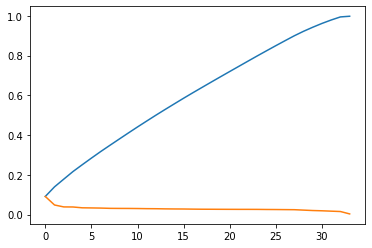

In [ ]:
#It is strating faltten with number of component = 34 (99% of variance)
pca = PCA(34)
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)
plt.plot(pd.Series(pca.explained_variance_ratio_))

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [ ]:
# Add your code here
pca = PCA(n_components=34)
x_train_Trans=pca.fit_transform(x_train)
x_test_Trans=pca.transform(x_test)

In [ ]:
# Print cell.
print('check_pca', (x_train_Trans[:50,:]))

check_pca [[ 1.24126926  0.91429111 -0.52598895 ... -0.00661786  0.79567409
  -0.35973512]
 [ 1.76269478  1.6167738  -0.99654206 ...  0.88362404  0.23203647
   0.68344718]
 [ 1.62426328  1.7806219  -0.5404437  ...  0.60111282 -0.54632229
  -0.37014813]
 ...
 [-0.63385075 -1.29560054  1.26913529 ...  0.57740922  0.98421305
   0.15501126]
 [-1.45683868 -0.88045435  1.1771027  ...  0.70630623  0.24534525
  -0.03889244]
 [ 0.19913747  0.55857394 -0.50748631 ... -0.16800178  0.1068785
   0.02473448]]


### 5.3.2.3 Random Forest. (10 pts)



##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Add your code here
# Only tune the max depth of the trees in the RF hyperparameter.
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators':[140],'max_depth':[25,30,35,40,45]},cv=5)
grid.fit(x_train_Trans, y_train)
grid.best_params_
# depth = [40]
# nEstimator = [140]

In [ ]:
# Add your code here
# Set n_estimators = 140
reg_RF = RandomForestRegressor(n_estimators=140, max_depth=40)
reg_RF.fit(x_train_Trans, y_train)
y_pred_RF = reg_RF.predict(x_test_Trans)

In [ ]:
# Print cell
print('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred_RF))))

#Task 1

##1.Linear Model - BayesianRidge Linear model

Using BayesianRidge model for reggression without parameter tuning.

In [ ]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge(compute_score=True)
model.fit(x_train, y_train)

BayesianRidge(compute_score=True)

In [ ]:
from sklearn import linear_model, metrics, model_selection

# Make predictions
y_predict_test = model.predict(x_test)
y_predict_train= model.predict(x_train)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % model.score(x_test, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.86
mse_value of Test= 0.44884817517718933
mse_value of Train= 0.44476747697092245


We can use dataset after performing PCA but it will come in a cost of accuracy of the model which is in this case calculated through mse_value. 

In [ ]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge(compute_score=True)
model.fit(x_train_Trans, y_train)

BayesianRidge(compute_score=True)

In [ ]:
from sklearn import linear_model, metrics, model_selection

# Make predictions
y_predict_test = model.predict(x_test_Trans)
y_predict_train= model.predict(x_train_Trans)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % model.score(x_test_Trans, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.85
mse_value of Test= 0.505963871152161
mse_value of Train= 0.5006279420573831


We can see that mse value (0.505963871152161) has increased from previous model without using PCA (0.44884817517718933). This indicates that models performance has been reduced slightly.

###Hyperparameter tuning BayesianRidge using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha_init':[8.0,8.5,9,9.5,10.0,10.5,11,11.5],
              'lambda_init': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9]}
grid_search = GridSearchCV(estimator=BayesianRidge(), param_grid = param_grid, cv = 3, n_jobs=-1)
grid_search.fit(x_train_Trans, y_train)
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

{'alpha_init': 8.0, 'lambda_init': 0.1}


Evaluating the best model using predict() and mean squared error and r squared value.

In [ ]:
# Make predictions
y_predict_test = best_model.predict(x_test_Trans)
y_predict_train= best_model.predict(x_train_Trans)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % best_model.score(x_test_Trans, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.85
mse_value of Test= 0.5059638711521997
mse_value of Train= 0.5006279420573824


R squared value of .85 is good score for a model. New mse value 0.5059638711521997 is lesser than previous one 0.505963871152161 which indicates the new model after hyperparam tuning is better one.

In [ ]:
import wandb
wandb.init(project="visualize-sklearn")

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
wandb.sklearn.plot_learning_curve(best_model, x_train, y_train)

##1.2. Ensemble method - Gradient Boosting Regressor model. 

Using GradientBoostingRegressor model for reggression without parameter tuning.

###Hyperparameter tuning BayesianRidge using GridSearchCV

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GBR = GradientBoostingRegressor()

Using GridSearchCV for param tuning.

In [ ]:
#Defining the params
parameters = {'learning_rate': [0.02,0.03 ],
              'subsample'    : [0.8, 0.6],
              'n_estimators' : [400,700],
              'max_depth'    : [2]
              }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train_Trans, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.03], 'max_depth': [2],
                         'n_estimators': [400, 700], 'subsample': [0.8, 0.6]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

best_model = grid_GBR.best_estimator_

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=2, n_estimators=700,
                          subsample=0.6)

 The best score across ALL searched params:
 0.8583747938623032

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 700, 'subsample': 0.6}


In [ ]:
# Make predictions
y_predict_test = best_model.predict(x_test_Trans)
y_predict_train= best_model.predict(x_train_Trans)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % best_model.score(x_test_Trans, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.86
mse_value of Test= 0.47060735935001874
mse_value of Train= 0.45801751208468755


In [ ]:
# Plot learning curve
wandb.sklearn.plot_learning_curve(best_model, x_train, y_train)

##Visualization

Comparing model performance with a simple baseline

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_validate

regressor = BayesianRidge(compute_score=True)
cv_results_tree_regressor = cross_validate(
    regressor, x_train, y_train, cv=cv, scoring="neg_mean_absolute_error", n_jobs=2
)

errors_tree_regressor = pd.Series(
    -cv_results_tree_regressor["test_score"], name="Bayesian Ridge regressor"
)
errors_tree_regressor.describe()

count    30.000000
mean      0.507695
std       0.002299
min       0.502602
25%       0.506449
50%       0.507549
75%       0.509342
max       0.511263
Name: Bayesian Ridge regressor, dtype: float64

In [ ]:

GBRegressor = GradientBoostingRegressor()
result_dummy = cross_validate(
    GBRegressor, x_train, y_train, cv=cv, scoring="neg_mean_absolute_error", n_jobs=2
)
errors_dummy_regressor = pd.Series(
    -result_dummy["test_score"], name="Gradient Boosting regressor"
)
errors_dummy_regressor.describe()

count    30.000000
mean      0.472426
std       0.001860
min       0.466842
25%       0.471491
50%       0.472750
75%       0.473819
max       0.475157
Name: Gradient Boosting regressor, dtype: float64

In [ ]:
all_errors = pd.concat(
    [errors_tree_regressor, errors_dummy_regressor],
    axis=1,
)
all_errors

,Bayesian Ridge regressor,Gradient Boosting regressor
0,0.508039,0.471451
1,0.505725,0.469002
2,0.504324,0.470873
3,0.506319,0.472604
4,0.505731,0.471988
5,0.507197,0.472943
6,0.510669,0.474132
7,0.508847,0.472180
8,0.507276,0.471790
9,0.511263,0.474357


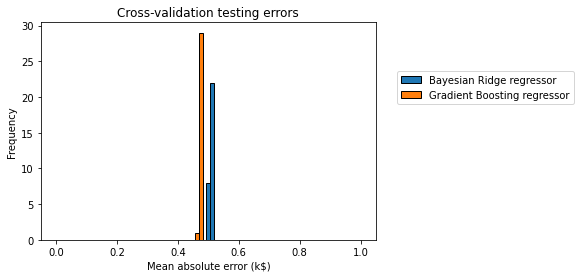

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bins = np.linspace(start=0, stop=1, num=80)
all_errors.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Cross-validation testing errors")

## Almost halfway there :)

Well done! Almost halfway there :)



# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again


In [5]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 39 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates

In [6]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.8 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CA-5').getOrCreate()

In [8]:
%load_ext sparkmagic.magics

In [9]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [10]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


### 5.1 Data Preparation for Spark ML (20 points)

Once the spark setup ready. Next, we need the prepared data for our ML algorithms. We will use the same data you processed in Section 1 but now in spark. 

Read in the csv  into a spark dataframe. Set the "inferSchema" flag to True so that the columns are the correct datatypes and not all strings. Further, set the parameter to the first row as column headers.

In [11]:
# Add your code here

train_sdf = spark.read.format('csv').options(header='true', inferSchema='true').load('combined_data.csv')

Let us make sure everything is smooth to proceed

In [ ]:
display(train_sdf.show())

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+-----------------+--------+--------+---------+----------+----------+----------+----------+-------------------------+---------------+------------------+----------------------+-------------------------+---------------+----------------------+---------------+--------------+------------------------+------------------------------+-----------------------+-----------------------+-----------------------------+--------------+---------------+-----------------+------------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|      comment_log|num_tags|desc_len|len_title|country_CA|country_FR|country_IN|country_US|category_Autos & Vehicles|category_Comedy|categor

None

Print out the dataframe schema and verify the datatypes

In [ ]:
#Task: Print the dataframe schema and verify
# Add your code here
display(train_sdf.printSchema())

root
 |-- video_id: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- likes_log: double (nullable = true)
 |-- label: double (nullable = true)
 |-- dislikes_log: double (nullable = true)
 |-- comment_log: double (nullable = true)
 |-- num_tags: integer (nullable = true)
 |-- desc_len: integer (nullable = true)
 |-- len_title: integer (nullable = true)
 |-- country_CA: integer (nullable = true)
 |-- country_FR: integer (nullable = true)
 |-- country_IN: integer (nullable = true)
 |-- country_US: integer (nullable = true)
 |-- category_Autos & Vehicles: integer (nullable = true)
 |-- category_Comedy: integer (nullable = true)
 |-- category_Education: integer (nullable = true)
 |-- category_Entertainment: integer (nullable = true)
 |-- category_Film & Animation: integer (nullable = true)
 |-- category_Gaming: integer (nullable = true)
 |-- category_Howto & 

None

Now, we have the processed data in hand. Next for the Spark ML, we need to create a feature column that has all features concatenated and a single column for labels.

You can use VectorAssembler() to create a feature vector from all categorical and numerical features. Let us call the call the final vector as “features”.

Now, list all columns in the data and store it in a list named 'all_columns'


In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [ ]:
# Add your code here
all_columns =train_sdf.columns

Now create a list of columns which you don't wan't to include in your features, i.e., the labels and probably other columns which are not useful for the machine learning model. Let us call this list drop_columns.

In [ ]:
# Add your code here
drop_columns = drop_columns = ['video_id','label']

In [ ]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

Now create a VectorAssembler object with columns you want to use for the ML models. Let us Name the output column as 'features'. These are the features that you will use later.  Let us name the vector assembler object 'assembler'

In [ ]:
# Add your code
assembler = VectorAssembler(inputCols=columns_to_use, outputCol='features')

In [ ]:
# Print assember stats
print('stat_assembler', (str(assembler.params), columns_to_use))

stat_assembler ('[Param(parent=\'VectorAssembler_daeedd874440\', name=\'handleInvalid\', doc="How to handle invalid data (NULL and NaN values). Options are \'skip\' (filter out rows with invalid data), \'error\' (throw an error), or \'keep\' (return relevant number of NaN in the output). Column lengths are taken from the size of ML Attribute Group, which can be set using `VectorSizeHint` in a pipeline before `VectorAssembler`. Column lengths can also be inferred from first rows of the data since it is safe to do so but only in case of \'error\' or \'skip\')."), Param(parent=\'VectorAssembler_daeedd874440\', name=\'inputCols\', doc=\'input column names.\'), Param(parent=\'VectorAssembler_daeedd874440\', name=\'outputCol\', doc=\'output column name.\')]', ['comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'likes_log', 'dislikes_log', 'comment_log', 'num_tags', 'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN', 'country_US', 'category_Autos & Vehicles', 'c

Now, we are ready to create a pipeline with different stages.  For out data so far, we just a single stage with the assember, however, you could have other stages  before that where you perform operations on the data, e.g, transforming categorical strings to numeric values or feature scaling operations.

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [ ]:
from pyspark.ml import Pipeline
# Add your code here
pipeline = Pipeline(stages=[assembler])
modified_data_sdf = pipeline.fit(train_sdf).transform(train_sdf).drop(*columns_to_use)
display(modified_data_sdf.show())

+-----------+------------------+--------------------+
|   video_id|             label|            features|
+-----------+------------------+--------------------+
|Ro6eob0LrCY|12.267652105461218|(38,[3,4,5,6,7,8,...|
|Yo84eqYwP98|12.977850768461046|(38,[3,4,5,7,8,10...|
|ceqntSXE-10|13.086018844077508|(38,[3,4,5,6,7,8,...|
|WuTFI5qftCE|13.737790068520269|(38,[3,4,5,6,7,8,...|
|ee6OFs8TdEg|11.861439196628254|(38,[3,4,5,6,7,8,...|
|teXaL6GdQRk|11.858314967191795|(38,[3,4,5,6,7,8,...|
|nduL7G_gJoY|12.142360449558572|(38,[3,4,5,6,7,8,...|
|QmpWE_SODZA| 11.41918605086728|(38,[3,4,5,6,7,8,...|
|GBVxEpQr8R8| 14.66606397042926|(38,[3,4,5,6,7,8,...|
|0RFhWyM6qbA|13.361753436588911|(38,[3,4,5,6,7,8,...|
|LhjhGOBIoHM|12.591559510922673|(38,[0,1,6,7,8,10...|
|lnFaRuWOLN0| 14.22427089749555|(38,[3,4,5,6,7,8,...|
|LGbUBietbJc|12.722249923614566|(38,[3,4,5,7,8,10...|
|JfanclGyrZY|10.882734304052615|(38,[3,4,5,6,7,8,...|
|PpECwr15oQQ|10.920781320026649|(38,[3,4,5,6,7,8,...|
|ZTTpRHC5ZH4| 12.05878419995

None

In [ ]:
#Print results
pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

check_pipeline (array(['video_id', 'label', 'features'], dtype=object), 38)


Now that we have the required data in the right format, Let us create our train and test sets. Let us, split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [ ]:
# Add your code here
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed = 2021)

In [ ]:
#Print results here
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (123516, 31051)


### 5.2 Linear regression using Spark ML (15 points)

In this section, train s linear regression model to our data and predict the views. This prediction should be based on "Big" data tools, i.e., Spark ML's linear regression. Create a model using this library, fit the training data. 
Afterwards, print the summary stats of the model, i.e, 
- the RMSE error, R2 score and any other information you find useful. Refere the Spark ML documentation online for the implementation.

In this section, we will train the model without any regularization!

In [ ]:
from pyspark.ml.regression import LinearRegression

# Add your code here

lr_model = LinearRegression(featuresCol='features', labelCol='label').fit(train_sdf)

In [ ]:
trainingSum = lr_model.summary

print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)



RMSE: 0.668584
r2: 0.864707


Let us investigate that if the model actually overfits the training data. 

Predict the views for your test data (Note: it is called 'transform' in spark ml). Evaluate the performance using 'RegressionEvaluator' in the Spark ML Regression library. Name prediction column as 'prediction'.

In [ ]:
# Add your code here
predictions = lr_model.transform(test_sdf)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Task: Compute RMSr on the test set

test_rmse_orig = lr_model.evaluate(test_sdf).rootMeanSquaredError

In [ ]:
#Print results here
predictions_to_print = predictions.toPandas()
lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['label'][0:50]]
print('result_lr_test', lranswer)

x=predictions_to_print['prediction'][0:50]
y=predictions_to_print['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

result_lr_test [0.6632988049175863, 0      9.397020
1     10.798508
2     11.742059
3     13.032224
4     12.633176
5      8.977947
6     14.367529
7     11.878420
8     10.323812
9      8.368530
10    13.970820
11    14.134549
12    14.234773
13     7.611624
14     7.722900
15     9.559984
16     8.199903
17    13.047153
18    12.726915
19    11.809773
20    11.767160
21    13.483729
22    11.249423
23    13.580851
24    13.630025
25    13.906636
26    10.656568
27    10.809065
28    13.599582
29    13.548624
30    13.916024
31    13.768171
32    14.263046
33    14.320084
34    10.081800
35     9.315161
36    12.105167
37    11.899017
38     9.339402
39    13.658362
40    13.891831
41    15.537367
42    16.971006
43    17.032986
44    17.089118
45    10.361185
46    11.996943
47    12.394432
48    13.357773
49     9.368723
Name: prediction, dtype: float64, 0      8.850947
1     11.487905
2     11.449357
3     13.068028
4     12.293296
5      9.276783
6     14.687038
7     11.347402
8 

Next, we will implement regularization to avoid overfitting. you can try different  regularization parameters, e.g., try LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2).

You can try different regularization hyperparameters to initialize three different regularized linear regression models. Compare these regularization methods with each other and the non-regularized method above.


In [ ]:
# Add your code here
LR=LinearRegression
model1= LR(featuresCol='features', labelCol='label', elasticNetParam=1, regParam=0.1)
model1_fit=model1.fit(train_sdf)
model2 = LR(featuresCol='features', labelCol='label', elasticNetParam=0, regParam=0.1)
model2_fit=model2.fit(train_sdf)
elastic_net_model =LR(featuresCol='features', labelCol='label', elasticNetParam=0.5, regParam=0.1).fit(train_sdf)

# Compute predictions using each of the models
l1_predictions = model1_fit.transform(test_sdf)
l2_predictions = model2_fit.transform(test_sdf)
elastic_net_predictions = elastic_net_model.transform(test_sdf)

# Task: Calculate the root mean squared error (RMSE) on test set for each of your models
test_rmse_l1 = model1_fit.evaluate(test_sdf).rootMeanSquaredError
test_rmse_l2 = model2_fit.evaluate(test_sdf).rootMeanSquaredError
test_rmse_elastic = elastic_net_model.evaluate(test_sdf).rootMeanSquaredError

In [ ]:
# Print your results here
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)

result_lr_all [0.7285216834003145, 0.6803621218764744, 0.7000002764956142]


### 5.3 Random Forest Regression 10 pts)

You need an understanding of random forest and its variations,i.e., boosted trees to succeed as a data scientist. These are ensemble methods that are know for generalization and are considered popular for classification and regression problems. Similar to linear regresssion, create a random forest regressor model. After it, train the model using the data and then evaluate its performance using the test data. Finally, compare performance of random forest model with the linear regression model.



In [ ]:
from pyspark.ml.regression import RandomForestRegressor
# Add your code here
rf_model = rf_model = RandomForestRegressor(labelCol="label", featuresCol="features").fit(train_sdf) #Task

In [ ]:
# Add code here to calculate predictions
predictions = predictions = rf_model.transform(test_sdf) #Task : Calculate predictions on the test set

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Add your code here to instatiate a regressionevaluator 
reg_evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
train_rmse_rf = reg_evaluator.evaluate(rf_model.transform(train_sdf)) #Task: Compute the training RMSE
rmse_rf = reg_evaluator.evaluate(predictions) #Task: Compute RMSE using the test set

In [ ]:
#Print results of predictions here
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['label'][0:50], rmse_rf]
print('check_rf_spark \n', answer)

x=predictions_to_reveal['prediction'][0:50]
y=predictions_to_reveal['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

check_rf_spark 
 [0.7337419900433939, 0     10.018681
1     10.824932
2     11.575199
3     13.302990
4     12.613303
5      9.314917
6     14.082229
7     12.440839
8     10.153400
9      9.252523
10    14.074722
11    14.156286
12    14.339942
13    10.114010
14    10.114010
15     9.169491
16     9.219770
17    12.844281
18    12.796572
19    11.711805
20    12.197049
21    13.372589
22    11.444773
23    13.623629
24    13.646548
25    13.528207
26    10.928705
27    11.028364
28    13.348322
29    13.354197
30    13.667015
31    13.910712
32    13.936569
33    13.936569
34    10.050188
35     9.268253
36    12.479217
37    11.430415
38     9.448552
39    13.570248
40    13.896164
41    15.799890
42    16.237404
43    16.237404
44    16.237404
45    10.797094
46    12.241628
47    12.554226
48    13.340674
49     9.314917
Name: prediction, dtype: float64, 0      8.850947
1     11.487905
2     11.449357
3     13.068028
4     12.293296
5      9.276783
6     14.687038
7     11.347402


### 5.4 Dimensionality Reduction using Principal Component Analysis (10pt)

The focus of this section is to utilize PCA to further reduce the dimensions of data, i.e., a lower dimensional space. After PCA perform linear regression on the new data. You can select a suitable value for the number of dimensions as calculated in previous section.

The steps are illustrated below:
1.   Initialization of PCA model
2.   Fit the PCA model using the training data
3.   Extract the PCA feature from the trained PCA model from step 2
4.   Train a linear regression model using the retreived PCA features
5.   Evaluate the trained model 's performance on the test set 

This section requires extra effort and therefore has less starter code. Spen time to understand and implement considering yourself a data scientist working on an assigned task.






In [ ]:
# Add your code for the PCA model and training here
from pyspark.ml.feature import PCA as PCA_ML
pca_Lr = PCA_ML(k=34, inputCol='features', outputCol='pcaFeature').fit(train_sdf).transform(train_sdf)

pca_lr_model=LinearRegression(featuresCol='pcaFeature', labelCol='label', elasticNetParam=1, regParam=0.1).fit(pca_Lr)

training_rmse_pca = reg_evaluator.evaluate(pca_lr_model.transform(pca_Lr))
 

TypeError: ignored

In [ ]:
# Add your code here
pca_Lr_test = PCA_ML(k=34, inputCol='features', outputCol='pcaFeature').fit(train_sdf).transform(test_sdf)

predictions = pca_lr_model.transform(pca_Lr_test) #Task: Retreive predictions on the test set

test_rmse_pca = reg_evaluator.evaluate(pca_lr_model.transform(pca_Lr_test)) #Task: Retreive RMSE for test data

In [ ]:
# Add your code here
predictions_to_grade = predictions.toPandas()
answer = [training_rmse_pca, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca]
print('check_pca_spark \n', answer)

x=predictions_to_grade['prediction'][0:50]
y=predictions_to_grade['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

print('\n \n Model Summery:',pca_lr_model.summary.r2)

#Task 2

##2.1 Linear Model -  GBT Regressor model

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Automatically identify categorical features, and index them.
# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(modified_data_sdf)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = modified_data_sdf.randomSplit([0.7, 0.3])

# Train a GBT model.
gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)

# Chain indexer and GBT in a Pipeline
pipeline = Pipeline(stages=[featureIndexer, gbt])

# Train model.  This also runs the indexer.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

gbtModel = model.stages[1]
print(gbtModel)  # summary only

+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
|10.315027457573734|10.584966928228392|(38,[3,4,5,6,7,8,...|
|12.789930739529765|13.144209014373521|(38,[3,4,5,6,7,8,...|
|11.420737526342727|11.449357139707065|(38,[3,4,5,6,7,8,...|
|11.485151264117158|11.889195171465508|(38,[3,4,5,6,7,8,...|
| 9.749051586817721|10.270939218446076|(38,[3,4,5,6,7,8,...|
+------------------+------------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.67183
GBTRegressionModel: uid=GBTRegressor_523b920390fd, numTrees=10, numFeatures=38


In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
 
# Define a grid of hyperparameters to test:
#  - maxDepth: maximum depth of each decision tree 
#  - maxIter: iterations, or the total number of trees 
paramGrid = ParamGridBuilder()\
  .addGrid(gbt.maxDepth, [2, 5])\
  .addGrid(gbt.maxIter, [10, 100 , 200])\
  .build()
 
# Define an evaluation metric.  The CrossValidator compares the true labels with predicted values for each combination of parameters, and calculates this value to determine the best model.
evaluator = RegressionEvaluator(metricName="rmse", labelCol=gbt.getLabelCol(), predictionCol=gbt.getPredictionCol())

# Declare the CrossValidator, which performs the model tuning.
crossValidator = CrossValidator(estimator=gbt, evaluator=evaluator, estimatorParamMaps=paramGrid)

In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[ featureIndexer,crossValidator])
pipelineModel = pipeline.fit(trainingData)

In [ ]:
predictions = pipelineModel.transform(testData)

In [ ]:
predictions.select("label", "prediction").show(10)

+------------------+------------------+
|             label|        prediction|
+------------------+------------------+
|10.584966928228392|  9.99336917727692|
|13.144209014373521| 12.74979255056291|
|11.449357139707065|11.431438813909205|
|11.889195171465508|11.753966304673808|
|10.270939218446076|  9.91798768992058|
|  9.80410910855585|10.308791072266352|
|13.313821402602102|13.171016035273908|
|13.467352102708112|13.237647465046205|
|  13.5830916229688|13.245834403651196|
|11.494364266781965| 11.44220964322424|
+------------------+------------------+
only showing top 10 rows



In [ ]:
rmse = evaluator.evaluate(predictions)
print("RMSE on our test set: %g" % rmse)

RMSE on our test set: 0.575491


In [ ]:
import pyspark.sql.functions as F
predictions_with_residuals = predictions.withColumn("residual", (F.col("label") - F.col("prediction")))
print(predictions_with_residuals.agg({'residual': 'mean'}))

DataFrame[avg(residual): double]

##2.2 Classification Model -  OneVsRest model.

 Data Loading Stage

In [ ]:
spark_df = spark.read.format('csv').options(header='true', inferSchema='true').load('combined_data.csv')

In [ ]:
spark_df.printSchema()

Data transformation

New column label_range is created with values from label to form a range using udf function

In [ ]:
from pyspark.sql.functions import udf
label_range = udf(lambda label: 1 if label < 3.0 else 
                       2 if (label <= 6.0 and label > 3.0) else
                       3 if (label <= 9.0 and label > 6.0) else
                       4 if (label <= 12.0 and label > 9.0) else
                       5 if (label <= 15.0 and label > 12.0) else
                       6 if (label <= 18.0 and label > 15.0) else
                       7 if (label <= 25.0) else 8)

spark_df = spark_df.withColumn('label_range', label_range(spark_df.label))

In [ ]:
spark_df = spark_df.withColumnRenamed("label_range","label")

In [ ]:
spark_df = spark_df.drop('video_id','comments_disabled','views_log')
spark_df.show()

Pipeline model to tranform features to vector column using VectorAssembler

In [ ]:
train_sdf = spark_df
# Add your code here
from pyspark.ml.feature import StringIndexer, VectorAssembler
all_columns =train_sdf.columns
drop_columns = ['video_id','label']
columns_to_use = [i for i in all_columns if i not in drop_columns]
assembler = VectorAssembler(inputCols=columns_to_use, outputCol='features')
# Print assember stats
print('stat_assembler', (str(assembler.params), columns_to_use))

from pyspark.ml import Pipeline
# Add your code here
pipeline = Pipeline(stages=[assembler])
modified_data_sdf = pipeline.fit(train_sdf).transform(train_sdf).drop(*columns_to_use)
display(modified_data_sdf.show())

In [ ]:
from pyspark.sql.types import IntegerType
#changing the column datatype to integer
modified_data_sdf = modified_data_sdf.withColumn("label", modified_data_sdf["label"].cast(IntegerType()))

In [ ]:
modified_data_sdf.printSchema()

root
 |-- label: integer (nullable = true)
 |-- features: vector (nullable = true)



Model Training

In [ ]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# generate the train/test split.
(train, test) = modified_data_sdf.randomSplit([0.8, 0.2])

# instantiate the base classifier.
lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)

# instantiate the One Vs Rest Classifier.
ovr = OneVsRest(classifier=lr)

# train the multiclass model.
ovrModel = ovr.fit(train)

# score the model on test data.
predictions = ovrModel.transform(test)

# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)

In [ ]:
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % (accuracy))

Test Error = 0.218104
Accuracy = 0.781896


###Hyperparameter Tuning

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import OneVsRest
from pyspark.ml.classification import LinearSVC

# param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]

# maxIter=10, regParam=0.3, elasticNetParam=0.8


lr = LogisticRegression()
ovr = OneVsRest(classifier=lr)
paramGrid = ParamGridBuilder().addGrid(lr.maxIter, [10, 100]).addGrid(lr.regParam,
                                                                              [0.001, 0.01, 1.0,10.0]).build()

crossval = CrossValidator(estimator=ovr,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(metricName="f1"),
                          numFolds=2) 

cvModel = crossval.fit(train)
bestModel = cvModel.bestModel

Evaluation

In [ ]:
# score the model on test data.
predictions = bestModel.transform(test)

# obtain evaluator.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# compute the classification error on test data.
accuracy = evaluator.evaluate(predictions)

In [ ]:
print("Test Error = %g" % (1.0 - accuracy))
print("Accuracy = %g" % (accuracy))

Test Error = 0.22267
Accuracy = 0.77733


# Submission

**Submission on the blackboard**. 
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.

In [ ]:
#TO PDF
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CA_5(IBRAHIM).ipynb')